<a href="https://colab.research.google.com/github/takenev59/Hugging_face/blob/main/Hugging_face_transformers_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install transformers
#! pip install datasets transformers[sentencepiece]

In [2]:
from datasets import list_datasets
from datasets import load_dataset
import pandas as pd

In [4]:
datasets = list_datasets()

In [5]:
list_datasets(with_details=True)[datasets.index("emotion")]

datasets.ObjectInfo(
	id='emotion',
	description='Emotion is a dataset of English Twitter messages with six basic emotions: anger, fear, joy, love, sadness, and surprise. For more detailed information please refer to the paper.',
	files=None
)

In [6]:
emotions_ds=load_dataset("emotion")

Using custom data configuration default
Reusing dataset emotion (/root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)


  0%|          | 0/3 [00:00<?, ?it/s]

In [7]:
emotions_ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [8]:
train_ds = emotions_ds["train"]

In [9]:
print(type(train_ds))
train_ds

<class 'datasets.arrow_dataset.Dataset'>


Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [10]:
len(train_ds)

16000

In [11]:
train_ds.features

{'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None),
 'text': Value(dtype='string', id=None)}

In [12]:
train_ds.column_names

['text', 'label']

In [13]:
train_ds[:5]

{'label': [0, 0, 3, 2, 3],
 'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy']}

In [14]:
train_ds["label"][:5]

[0, 0, 3, 2, 3]

In [15]:
train_ds["text"][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

In [16]:
# emotion.set_format(type="pandas")

In [17]:
type(emotions_ds["train"])

datasets.arrow_dataset.Dataset

In [19]:
type(emotions_ds["train"][:])

dict

In [20]:
emotions_ds.set_format(type="pandas")

In [21]:
type(emotions_ds["train"][:])

pandas.core.frame.DataFrame

In [22]:
emotions_df=emotions_ds["train"][:]

In [26]:
emotions_df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [33]:
train_ds.features

{'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None),
 'text': Value(dtype='string', id=None)}

In [34]:
train_ds.features['label']

ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None)

In [37]:
train_ds.features['label'].names

['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [47]:
[each_prop for each_prop in dir(train_ds.features['label']) if not each_prop.startswith('_')] ## all the list of 

['dtype',
 'encode_example',
 'id',
 'int2str',
 'names',
 'names_file',
 'num_classes',
 'pa_type',
 'str2int']

In [48]:
train_ds.features['label'].int2str(0)

'sadness'

In [50]:
train_ds.features['label'].str2int('sadness')

0

In [52]:
train_ds.features['label'].num_classes

6

In [65]:
 emotions_df['lable_name']=emotions_df['label'].apply(lambda x : train_ds.features['label'].int2str(x))


In [67]:
emotions_df.head(3)

,text,label,lable_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger


In [69]:
emotions_df['lable_name'].value_counts(ascending=True)

surprise     572
love        1304
fear        1937
anger       2159
sadness     4666
joy         5362
Name: lable_name, dtype: int64

In [70]:
import matplotlib.pyplot as plt

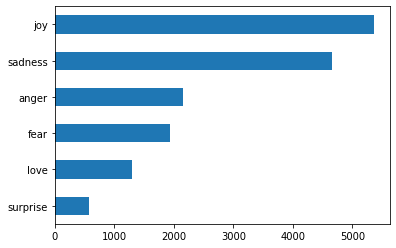

In [71]:
emotions_df['lable_name'].value_counts(ascending=True).plot.barh()
plt.show()

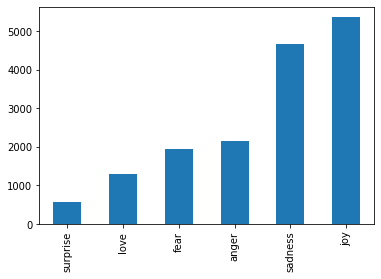

In [73]:
emotions_df['lable_name'].value_counts(ascending=True).plot.bar()
plt.show()